In [1]:
pip install torch torchvision --quiet


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas matplotlib scikit-learn --quiet


Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define transformations: Convert to Tensor and Normalize
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the training dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create DataLoader for batching
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [4]:
import torch.nn as nn
import torch.optim as optim

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input (MNIST images are 28x28 pixels)
        x = torch.relu(self.fc1(x))  # ReLU activation
        x = self.fc2(x)
        return x

# Instantiate the model
model = SimpleNN(input_size=28*28, hidden_size=128, output_size=10)  # 10 classes for MNIST digits


In [5]:
criterion = nn.CrossEntropyLoss()  # For multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [6]:
epochs = 5  # Train for 5 epochs
for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0

    for images, labels in train_loader:
        optimizer.zero_grad()  # Zero gradients

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}')


Epoch [1/5], Loss: 0.3812
Epoch [2/5], Loss: 0.1968
Epoch [3/5], Loss: 0.1467
Epoch [4/5], Loss: 0.1162
Epoch [5/5], Loss: 0.1000


In [7]:
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # No need to track gradients during evaluation
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total:.2f}%')


Accuracy: 96.49%


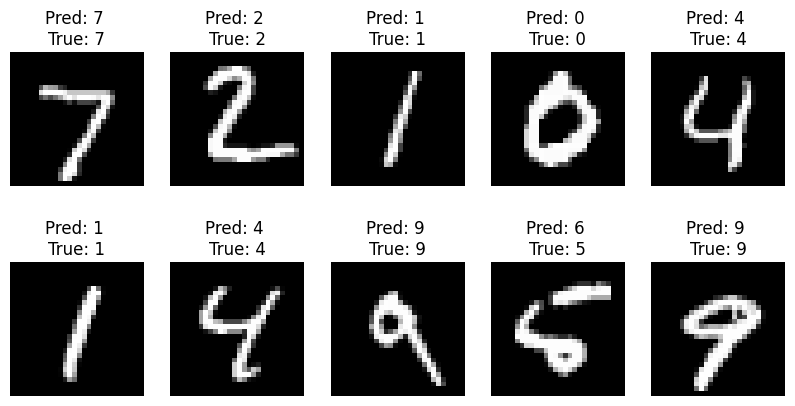

In [9]:
# Visualize predictions
import numpy as np
import matplotlib.pyplot as plt
model.eval()  # Set model to evaluation mode
images, labels = next(iter(test_loader))  # Get a batch of images and labels from the test loader

# Make predictions
with torch.no_grad():  # No need to track gradients during evaluation
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)  # Get the predicted labels

# Plot the first 10 images in the batch and their predictions
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for i in np.arange(10):  # Plot the first 10 images
    axes[i].imshow(images[i].squeeze(), cmap='gray')  # Display the image
    axes[i].set_title(f"Pred: {predicted[i]} \nTrue: {labels[i]}")  # Show predicted and true labels
    axes[i].axis('off')  # Hide axes

plt.show()
